# Simulate atmospheric transparency

In [35]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as plt3d
import numpy as np
import os,sys
import matplotlib as mpl
import pandas as pd
import itertools

from astropy import units as u
from astropy.coordinates import Angle

import time
from datetime import datetime,date
import dateutil.parser
import pytz

import argparse

import logging
import coloredlogs
import configparser


In [17]:
from astropy.io import fits

In [19]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [33]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran2'

In [41]:
sys.path.append('../libradtran')

In [42]:
import libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran2/


In [21]:
# date
today = date.today()
string_date = today.strftime("%Y-%m-%d")


# time
now = datetime.now()
current_time = now.strftime("%H:%M:%S")

tim = time.localtime()
current_time = time.strftime("%H:%M:%S", tim)



#timezones
tz_LA = pytz.timezone('America/Los_Angeles')
datetime_LA = datetime.now(tz_LA)
print("LA time:", datetime_LA.strftime("%H:%M:%S"))


tz_NY = pytz.timezone('America/New_York')
datetime_NY = datetime.now(tz_NY)
print("NY time:", datetime_NY.strftime("%H:%M:%S"))

tz_London = pytz.timezone('Europe/London')
datetime_London = datetime.now(tz_London)
print("London time:", datetime_London.strftime("%H:%M:%S"))

tz_Paris = pytz.timezone('Europe/Paris')
datetime_Paris = datetime.now(tz_Paris)
print("Paris time:", datetime_Paris.strftime("%H:%M:%S"))



LA time: 11:10:22
NY time: 14:10:22
London time: 19:10:22
Paris time: 20:10:22


In [22]:
# start with logs
#-----------------
logging.basicConfig()
logging.root.setLevel(logging.NOTSET)

handle = __name__

logger = logging.getLogger(handle)
# logging.getLogger().setLevel(logging.INFO)
logger.setLevel(logging.DEBUG)

# If you don't want to see log messages from libraries, you can pass a
# specific logger object to the install() function. In this case only log
# messages originating from that logger will show up on the terminal.
coloredlogs.install(level='DEBUG', logger=logger)
coloredlogs.install(fmt='%(asctime)s,%(msecs)03d %(hostname)s %(name)s[%(process)d] %(levelname)s %(message)s')

In [23]:
# arguments
#----------


parser = argparse.ArgumentParser()
parser.add_argument("--config",action="store", dest="configfile",help=f" run generate -config configfilename, with by ex configfilename = default.ini")
#results_args = parser.parse_args()

results_args=""
   

In [24]:
msg = f"Start {parser.prog} at date : {string_date} and time :{current_time} and with arguments:{results_args}"
logger.info(msg)

2020-09-11 20:10:22,062 MacBook-Pro-de-admin.local __main__[32225] INFO Start ipykernel_launcher.py at date : 2020-09-11 and time :20:10:22 and with arguments:


In [25]:
# config file
# --------------
configfile = "config/default.ini"
packetnum =100
#config_filename = results_args.configfile
config_filename = configfile
msg = f"Configuration file : {config_filename}"
logger.info(msg)

2020-09-11 20:10:22,069 MacBook-Pro-de-admin.local __main__[32225] INFO Configuration file : config/default.ini


In [26]:
# 1) CONFIGURATION
#------------------
logger.info('1) Configuration')

config = configparser.ConfigParser()

if os.path.exists(config_filename):
    config.read(config_filename)
else:
    msg = f"config file {config_filename} does not exist !"
    logger.error(msg)

config_section = config.sections()

2020-09-11 20:10:22,088 MacBook-Pro-de-admin.local __main__[32225] INFO 1) Configuration


In [27]:
if len(config_section) == 0:
    msg = f"empty config file {config_filename} !"
    logger.error(msg)    

In [31]:
if 'GENERAL' in config_section:

    FLAG_DEBUG = bool(config['GENERAL']['FLAG_DEBUG'])
    FLAG_VERBOSE = bool(config['GENERAL']['FLAG_VERBOSE'])
    FLAG_PLOT = bool(config['GENERAL']['FLAG_PLOT'])
    FLAG_PRINT = bool(config['GENERAL']['FLAG_PRINT'])
else:
    msg = f"empty section GENERAL in config file {config_filename} !"
    logger.error(msg)


if 'SIMTRANSPARENCY'in config_section:
    input_file = config['SIMTRANSPARENCY']['inputfile']
    input_dir = config['SIMTRANSPARENCY']['inputdir']

    output_file = config['SIMTRANSPARENCY']['outputfile']
    output_dir = config['SIMTRANSPARENCY']['outputdir']

    packetsize = int(config['SIMTRANSPARENCY']['packetsize'])





2020-09-11 20:14:19,182 MacBook-Pro-de-admin.local __main__[32225] INFO FLAG_PLOT = True
2020-09-11 20:14:19,183 MacBook-Pro-de-admin.local __main__[32225] INFO NROWMIN = 9900 , NROWMAX  = 9999  


In [46]:
msg = f"FLAG_PLOT = {FLAG_PLOT}"
logger.info(msg)

# range inside the atmospheric parameter file
NROWMIN = (packetnum - 1) * packetsize
NROWMAX = (packetnum) * packetsize - 1

msg = f"NROWMIN = {NROWMIN} , NROWMAX  = {NROWMAX}  "
logger.info(msg)

2020-09-11 20:28:40,260 MacBook-Pro-de-admin.local __main__[32225] INFO FLAG_PLOT = True
2020-09-11 20:28:40,261 MacBook-Pro-de-admin.local __main__[32225] INFO NROWMIN = 9900 , NROWMAX  = 9999  


'/Users/dagoret/MacOSX/External/libRadtran2'

In [48]:
am=1
pwv=5
ozone=300
pressure=0
cloudext=0

path,thefile=libsimulateVisible.ProcessSimulation(am,pwv,ozone,pressure,prof_str='us',proc_str='sa',cloudext=cloudext)
data = np.loadtxt(os.path.join(path,thefile))
wl = data[:,0]
atm = data[:,1] 


--------------------------------------------
 1) airmass =  1
 2) pwv =  5
 3) oz =  300
 4) pressure  =  0
 5) atmospheric profile =  us
 6) interaction processes =  sa
 7) cloud extinction =  0
--------------------------------------------
Running uvspec with input file:  simulations/RT/2.0.3/LS/pp/us/sa/rtvis/in/RT_MPL_pp_us_sa_rtvis_z10_wv50_oz30_cld0000.INP
Output to file                :  simulations/RT/2.0.3/LS/pp/us/sa/rtvis/out/RT_MPL_pp_us_sa_rtvis_z10_wv50_oz30_cld0000.OUT
Path to exec                :  /Users/dagoret/MacOSX/External/libRadtran2/
uvspec cmd:  /Users/dagoret/MacOSX/External/libRadtran2/bin/uvspec  < simulations/RT/2.0.3/LS/pp/us/sa/rtvis/in/RT_MPL_pp_us_sa_rtvis_z10_wv50_oz30_cld0000.INP > simulations/RT/2.0.3/LS/pp/us/sa/rtvis/out/RT_MPL_pp_us_sa_rtvis_z10_wv50_oz30_cld0000.OUT


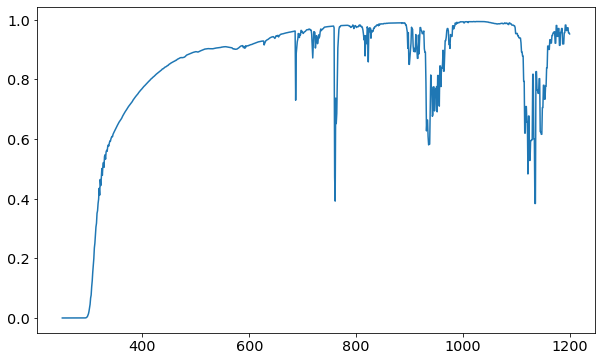

In [49]:
plt.plot(wl,atm)